In [180]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [181]:
import os
myCmd1 = 'g++ __main__.cpp -o a'
myCmd2 = './a'

In [182]:
def afficheHisto_1data(data):   #Prend en argument 1 liste de scores
    gagnant = data[:,2]
    labels, counts = np.unique(gagnant, return_counts=True)
    plt.bar(labels, counts, align='center', color = "orange")
    #plt.hist(gagnant, color="orange", bins=3)

    plt.xticks([0, 1, 2],["Egalité", "Blanc", "Noir"])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    print("Nombre d'égalité, de victoires de blanc, de victoires de Noir : ", counts)
    
def afficheHisto_moy(moy, std, N):   #Prend en argument une moyenne de scores
    plt.bar([0, 1, 2], moy, align='center', color = "orange")
    plt.xticks([0, 1, 2],["Egalité", "Blanc", "Noir"])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    print("Nombre d'égalité, de victoires de blanc, de victoires de Noir en moyenne: ", moy)
    
    for i in range(3):
        plt.axhline(y = moy[i]+std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c='k', linestyle="dashed")
        plt.axhline(y = moy[i]-std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c='k', linestyle="dashed")
    plt.axhline(y = (N-moy[0])/2, xmin=0, xmax=3, c="darkred", linestyle="dashed")
    

In [183]:
def stats(N):    #fait une moyenne sur N listes du nb de victoires B/N
    print("Nombre de set de parties sur lequel on moyenne: ", N)
    nbVict = np.zeros((N,3))   # tableau du nb de vict pour chaque set de data 
    for i in range(N):         # (0 = egalité, 1 = blanc, 2 = noir)
        os.system(myCmd1)
        os.system(myCmd2)
        data = np.loadtxt("resultats.dat", delimiter = ' ')   #[scoreB, scoreN, gagnant]
        gagnant = data[:,2]
        nbVict[i][0] = np.sum(gagnant == 0)
        nbVict[i][1] = np.sum(gagnant == 1)
        nbVict[i][2] = np.sum(gagnant == 2)
        
    afficheHisto_moy(np.mean(nbVict, axis=0), np.std(nbVict, axis=0), N)
    #print(np.std(nbEgalite), np.std(nbVictB), np.std(nbVictN))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 63.] [315  34  19  27  30  17  19  37  49  63  60  81 101 122 160 149 203 218
 224 240 270 306 302 282 330 307 326 326 337 310 360 357 353 345 324 267
 290 275 268 224 191 214 212 150 160 139 113  95  92  90  59  47  34  28
  27   8   6   2   2   2   1   1]
9965.868969011108 11.4498755142273 28.941067433229865


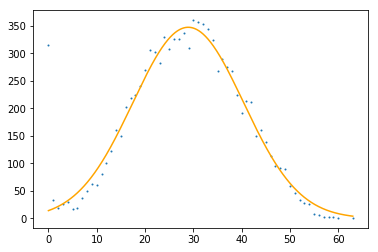

In [226]:
from scipy.optimize import curve_fit

def model(x, a, sigma, mu):
    return a * (1/(sigma*np.sqrt(2*np.pi))) * np.exp(- (x-mu)*(x-mu)/(2*sigma*sigma))

def gaussienne():      #affiche la distrib gaussienne du score de blanc
    N = 10000           #nbParties
    #os.system(myCmd1)
    #os.system(myCmd2)
    data = np.loadtxt("resultats.dat", delimiter = ' ')   #[scoreB, scoreN, gagnant]
    scoreBlanc = data[:,1]
    labels, counts = np.unique(scoreBlanc, return_counts=True)
    print(labels, counts)
    xdata = labels
    ydata = counts
    popt, pcov = curve_fit(model, xdata, ydata, p0 = (1,1,30))  #popt renvoie les paramètres optimisés
    print(*popt)
    x = np.linspace(np.min(labels),np.max(labels),1000)
    plt.scatter(xdata,ydata, s=1)
    plt.plot(x, model(x, *popt), c="orange")
    
gaussienne()

In [ ]:
os.system(myCmd1)
os.system(myCmd2)